In [4]:
import data
from models import Transformer
from a_redundant.trainer import Trainer
import matplotlib.pyplot as plt

In [5]:
train_loader, test_loader = data.get_mnist_data(batch_size=64)

batched_images, batched_labels = next(iter(train_loader))
print(f"Data shape: {batched_images.shape}, Labels shape: {batched_labels.shape}")    

Data shape: torch.Size([64, 1, 28, 28]), Labels shape: torch.Size([64])


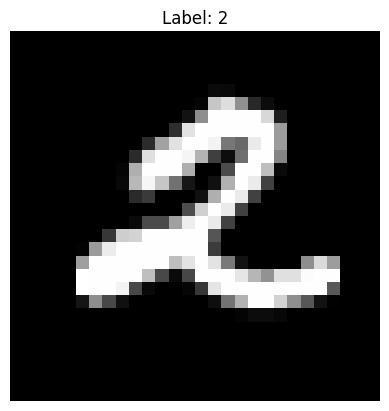

In [22]:
n = 5
plt.imshow(batched_images[n].squeeze().numpy(), cmap='gray')
plt.title(f"Label: {batched_labels[n].item()}")
plt.axis('off')
plt.show()


In [7]:
number_of_patches = 4
patch_size = batched_images.shape[2] // number_of_patches
if batched_images.shape[2] % number_of_patches != 0:
    raise ValueError("Image size must be divisible by the number of patches.")

patches = batched_images[0].unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)
patches.size()

torch.Size([1, 4, 4, 7, 7])

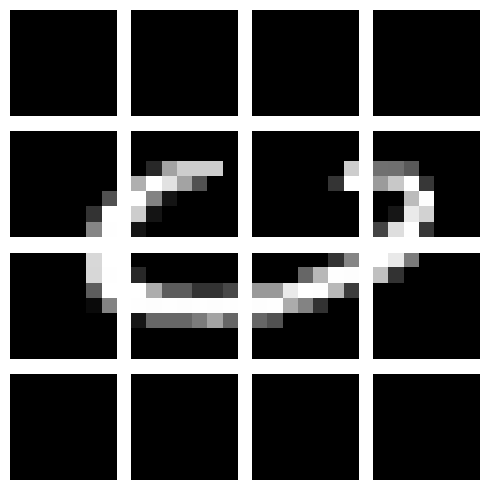

In [8]:
fig, axes = plt.subplots(number_of_patches, number_of_patches, figsize=(5, 5))
for i in range(number_of_patches):
    for j in range(number_of_patches):
        axes[i, j].imshow(patches[0, i, j].numpy(), cmap='gray')
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [9]:
for batch_index, (image, target) in enumerate(train_loader):
    if batch_index == 1:
        print(f"Batch {batch_index} - Image shape: {image.shape}, Target shape: {target.shape}")
        break

len(train_loader)

Batch 1 - Image shape: torch.Size([64, 1, 28, 28]), Target shape: torch.Size([64])


938

In [10]:
batch_size = batched_images.size(0)
patches = batched_images.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
patch_vectors = patches.contiguous().view(batch_size, number_of_patches **2, patch_size **2)
patch_vectors.size()
# patches = patches.contiguous().view(batch_size, number_of_patches, patch_size)

torch.Size([64, 16, 49])